<img src="images/logo_verde_horz.png" width="600">

# FUNCIÓN DE PLANCK
By: Juan Carlos Basto Pineda  
Cód: 2000106

### INTRODUCCIÓN:

- En 1920 se quería entender la radiación de cuerpo negro
- Plack propone la idea de osciladores cuantizados
- Marca el inicio de la mecánica cuántica

La función de Planck:
$\mathcal{S(\lambda, T) = \frac{\mathcal{2} \mathcal{\pi} \mathcal{c}^2 \mathcal{h}}{\mathcal{\lambda} ^5} \cdot \frac{\mathcal{1}}{\mathcal{e}^{\frac{\mathcal{hc}}{\mathcal{\lambda k T}}}\mathcal{-1}}}$ 

### Notas:
Es **muy importante** aprovechar las herramientas que nos
ofrece cada tipo de entorno, como usar los [hyperlinks](https://edisciplinas.usp.br/pluginfile.php/48089/course/section/16461/qsp_chapter10-plank.pdf), las listas, *cursivas*, etc., usándolas en
este caso para construir un entregable de calidad.  

### FUNDAMENTAL:
Hacer una introducción al trabajo, decir cuál es el contexto
del tema, qué es lo que ustedes van a presentar, y si hay trabajo
práctico cómo lo hicieron.


Obviamente una figura es siempre también una buena idea:

<img src="./images/plancky.png">


In [4]:
#Importamos algunas bibliotecas importantes
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as unit
import astropy.constants as ct

In [46]:
%matplotlib inline

### Flujo del código

Explique cómo funciona su código, qué hace y cómo se organiza.
Por ejemplo: En las sgtes celdas se estructura la parte central ccodigo así:
- definimos la funcion
- se presenta un gráfico de ejemplo
- luego adaptamos la solución para grafica varias temperaturas

In [5]:
# Los docstrings de las funciones demuestran que usted
# le apunta a estándares de calidad, y le van a ayudar
# muchísimo a ustedes mismos del futuro cuando quieran
# reutilizar código, o si comparten su trabajo con colegas

def planck(lam, T):
    """
    Esta función calcula la energia irradiada por un cuerpo negro
    utilizando la formula de planck
    Se calcula en longitudes de onda dadas en nm
    
    Params:
    lam:
        vector de longitudes de onda dadas en nm
        si tienen otra unidad, la función se encarga de convertirlas
    T:
        La tempertura, debe tener unidades de grados Kelvin
    
    Returns:
    E:
        El vector de la energia calculada en las longitudes de
        onda provistas. Tiene unidades de tal y tal...
    """   
    
    exponente = ct.h * ct.c / (lam * ct.k_B * T)
    A = 2 * np.pi * ct.c**2 * ct.h / lam**5
    # Pasamos la energía a unidades del S.I.
    A = A.to("J / s * m^3")
    E = A / (np.exp(exponente) - 1)
    
    return E

In [6]:
# Estos valores individuales los usamos mientras hacíamos los tests
# Al ver que ya funcionaba, pasamos a construir la solución final en 
# la cual iteramos sobre varias temperaturas. Por lo tanto esta celda
# no debería quedar en la versión final, en el entregable no se
# pone todo el trabajo en borrador sino la versión final.

#lam = np.linspace(10,3000,100)*unit.nm
#T = 5000*unit.K

`Otro comentario relacionado con esto que está aquí arriba. No hace falta que impriman por ejemplo el vector de longitudes de onda, para ustedes mismos si mientras están probando que les está dando lo que esperan en cada paso, pero no en el entregable, es un larguero y no trae información valiosa, solo dificulta la revisión del trabajo.`

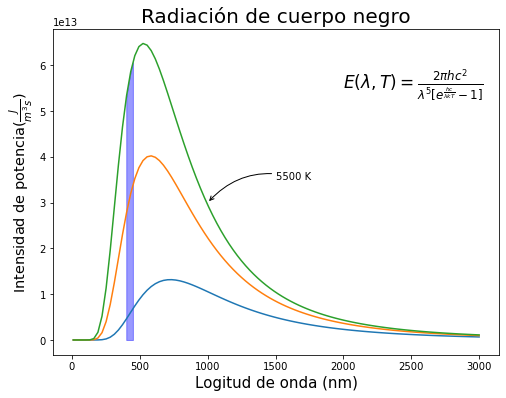

In [13]:
##--- Este estilo de comentarios es estético para dividir los bloques grandes 
##--- Sería mejor no tener bloques tangrandes en una misma celda, pero en casos
## --- como el del gráfico es difícil escapar, no se puede separa en celdas


##--- Definimos los parámetros ---##
#-----------------------------------
lam = np.linspace(10,3000,100) * unit.nm
T_list = np.array([4000,5000,5500])*unit.K


##--- Iniciamos la figura ---##
#------------------------------
plt.figure(figsize=(8,6))

# Graficamos las curvas
for T in T_list:
    E = planck(lam,T)
    plt.plot(lam,E)

# Agrega las zonas sombreadas
x_blue = np.arange(400,450,1)*unit.nm
y_blue = planck(x_blue,T=5500*unit.K)

plt.fill_between(x_blue,y_blue,alpha=0.4,color="b")


##--- Personalizaciones ---##
#------------------------------
plt.title('Radiación de cuerpo negro',fontsize=20) 
plt.xlabel("Logitud de onda (nm)", fontsize=15)
plt.ylabel(r'Intensidad de potencia$(\frac{J}{m^{3}s})$', fontsize=14.5)

# Se deben evitar las líneas demasiado largas (más de 80 caracteres)
# En el caso de funciones con muchos parámetros de entrada,
# se pueden dividir las líneas por las comas y python no reclama
plt.annotate("5500 K",
             xytext = (1500, 3.5e13),
             xy= (1000, 3.e13),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=0.3")
             )

plt.text(2000,
         5.5e13,
         r'$E(\lambda , T) = \frac{2\pi h c^{2}}{\lambda ^{5}[e^{\frac{hc}{\lambda k T }}-1]}$',
         size = 17
         ) 

# El uso explícito de este comando elimina algunos prints no deseados
# al ostrar el gráfico (pueden comentarla y verán)
plt.show()

## Y finalmente vamos con el gráfico interactivo
Funciona para cálculos también, no solamente para gráficos

In [16]:
# Importamos la biblioteca necesaria
from ipywidgets import interact

In [17]:
# Este es el parámetro interactivo
@interact(T=(3000,10000))

# Debe estar seguido por una función definida para recibir
# ese parámetro como entrada
def plot_planck(T):
    plt.figure()
    plt.ylim(0,1e15)
    E = planck(lam,T*unit.K)
    plt.plot(lam,E)

interactive(children=(IntSlider(value=6500, description='T', max=10000, min=3000), Output()), _dom_classes=('w…